In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data=pd.read_csv('Delivery_csv1.csv')

In [3]:
data.head()

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


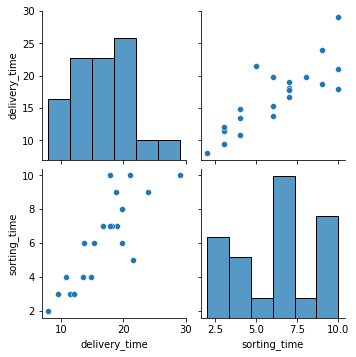

In [6]:
sns.pairplot(data)

In [7]:
## Checking For Any Outliers

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='delivery_time'>

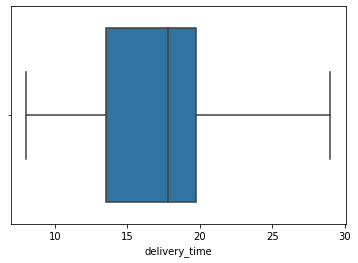

In [8]:
sns.boxplot(data['delivery_time'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sorting_time'>

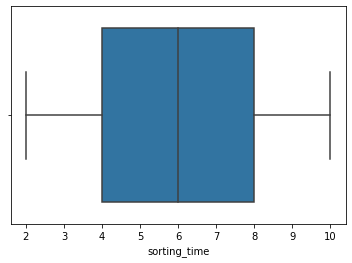

In [9]:
sns.boxplot(data['sorting_time'])

## Correlation

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

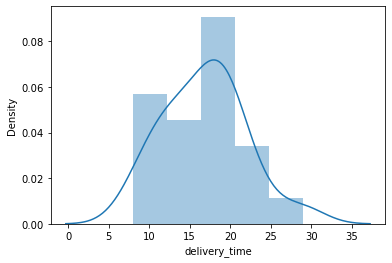

In [10]:
sns.distplot(data['delivery_time'])

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

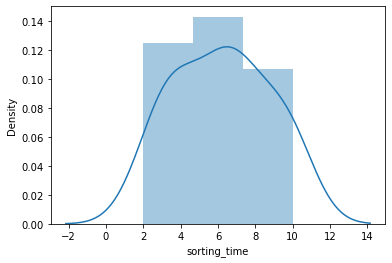

In [11]:
sns.distplot(data['sorting_time'])

In [12]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


## Fitting Linear regression Model

In [13]:
import statsmodels.formula.api as smf
model=smf.ols("delivery_time~sorting_time",data=data).fit()

In [14]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           3.98e-06
Time:                        14:00:06   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
model.params
## B0=6.5827,B1=1.6490

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
## t-value
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [17]:
## p-value
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [18]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [56]:
pred1 = model.predict(pd.DataFrame(data['sorting_time']))
pred1.corr(data.delivery_time)

0.8259972607955327

## Predicting Delivery time using sorting time

In [19]:
newdata=pd.Series([11,5,12,13,16,14])

In [20]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [21]:
model.predict(data_pred)

0    24.721953
1    14.827833
2    26.370973
3    28.019993
4    32.967052
5    29.669013
dtype: float64

In [22]:
model.predict(data)

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

## Lets Apply Logarithmic Transformation On Data

In [23]:
model2 = smf.ols('delivery_time~np.log(sorting_time)',data=data).fit()
model2.params
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 19 Mar 2022   Prob (F-statistic):           2.64e-06
Time:                        14:09:42   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
print(model2.conf_int(0.01)) # 99% confidence level

                             0          1
Intercept            -5.862666   8.182033
np.log(sorting_time)  5.115458  12.971369


In [57]:
pred2 = model2.predict(pd.DataFrame(data['sorting_time']))
pred2.corr(data.delivery_time)

0.8339325279256244

In [34]:
pred2 = model2.predict(data.sorting_time)
pred2

0     21.982913
1     13.696517
2     17.363305
3     21.030094
4     21.982913
5     17.363305
6     18.757354
7     11.094889
8     21.982913
9     21.030094
10    19.964933
11    13.696517
12    18.757354
13    11.094889
14    11.094889
15    13.696517
16    17.363305
17    18.757354
18     7.428100
19    18.757354
20    15.714496
dtype: float64

In [36]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'delivery_time')

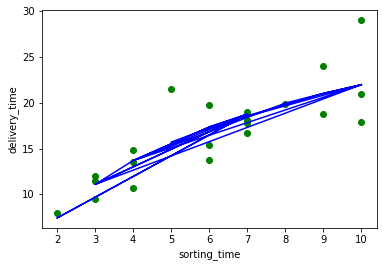

In [37]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data['sorting_time'],pred2,color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')


In [38]:
## Lets apply logarithmic Transformation On delivery_time

In [39]:
model3 = smf.ols('np.log(delivery_time)~sorting_time',data=data).fit()
model3.params
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 19 Mar 2022   Prob (F-statistic):           1.59e-06
Time:                           14:23:07   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
print(model3.conf_int(0.01)) # 99% confidence level

                     0         1
Intercept     1.826774  2.415969
sorting_time  0.061378  0.149725


In [42]:
pred_log = model3.predict(pd.DataFrame(data['sorting_time']))
pred_log

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64

In [43]:
pred3=np.exp(pred_log)  # as we have used log(AT) in preparing model so we need to convert it back
pred3


0     23.972032
1     12.725123
2     15.716034
3     21.570707
4     23.972032
5     15.716034
6     17.465597
7     11.450423
8     23.972032
9     21.570707
10    19.409927
11    12.725123
12    17.465597
13    11.450423
14    11.450423
15    12.725123
16    15.716034
17    17.465597
18    10.303411
19    17.465597
20    14.141728
dtype: float64

In [44]:
pred3.corr(data.delivery_time)

0.8085780108289259

In [ ]:
delivery_time	sorting_time

x=at y=waist

Text(0, 0.5, 'delivery_time')

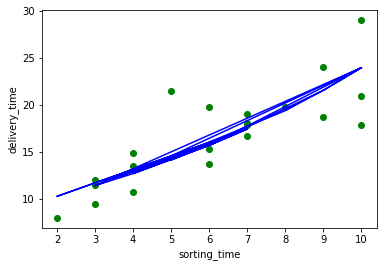

In [45]:
plt.scatter(x=data['sorting_time'],y=data['delivery_time'],color='green');plt.plot(data.sorting_time,np.exp(pred_log),color='blue');plt.xlabel('sorting_time');plt.ylabel('delivery_time')

In [46]:
resid_3 = pred3-data.delivery_time

In [48]:
resid_3

0     2.972032
1    -0.774877
2    -4.033966
3    -2.429293
4    -5.027968
5     0.366034
6    -1.534403
7     1.950423
8     6.072032
9     2.820707
10   -0.420073
11    1.975123
12    0.785597
13   -0.049577
14   -0.579577
15   -2.154877
16    1.966034
17   -0.644403
18    2.303411
19   -0.364403
20   -7.358272
dtype: float64

## so we will consider the model having highest R-Squared value which is the log transformation - model3
## getting residuals of the entire data set

Text(0, 0.5, 'Standardized Residual')

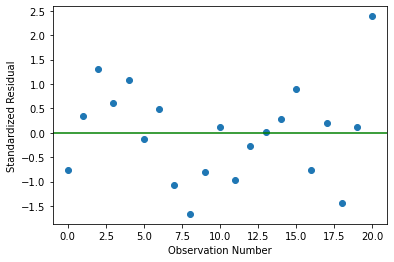

In [50]:
student_resid = model3.resid_pearson 
student_resid
plt.plot(model3.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")


Text(0, 0.5, 'Actual')

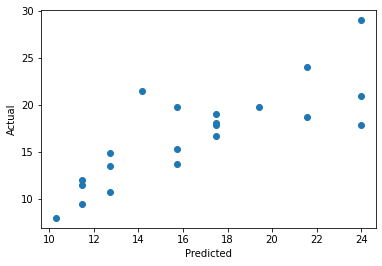

In [52]:
# Predicted vs actual values
plt.scatter(x=pred3,y=data.delivery_time);plt.xlabel("Predicted");plt.ylabel("Actual")


## Lets Predict On New Values

In [59]:
newdata=pd.Series([11,5,12,13,16,14])

In [60]:
data_pred=pd.DataFrame(newdata,columns=['sorting_time'])

In [61]:
model3.predict(data_pred)

0    3.282439
1    2.649130
2    3.387991
3    3.493543
4    3.810197
5    3.599094
dtype: float64

In [62]:
model3.predict(data)

0     3.176888
1     2.543578
2     2.754681
3     3.071336
4     3.176888
5     2.754681
6     2.860233
7     2.438027
8     3.176888
9     3.071336
10    2.965785
11    2.543578
12    2.860233
13    2.438027
14    2.438027
15    2.543578
16    2.754681
17    2.860233
18    2.332475
19    2.860233
20    2.649130
dtype: float64